# S06 T01: Tasca dades, probabilitats i estadístiques

**Objectius**:
 - Calcular diferents estadístiques de les dades
 - Representar gràficament diferents estadístiques de les dades

## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

Data set from https://www.kaggle.com/thegreatcoder/laliga-player-stats

In [6]:
df=pd.read_csv('laliga_player_stats_english.csv')
df.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [9]:
df.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [10]:
df.Passes.describe()

count    556.000000
mean     298.276849
std      323.996696
min        0.000000
25%        1.436000
50%      165.000000
75%      579.250000
max      987.000000
Name: Passes, dtype: float64

Of the 556 players of the dataset:
 - the mean on number of passes is 298
 - the median is the same as the 50% quartile, therefore 165 passes
 - the standard deviation is 324 passes

In [12]:
df.Passes.median()

165.0

We can calculate the mode with a couple of methods.

In [16]:
stats.mode(df.Passes)

ModeResult(mode=array([0.]), count=array([67]))

In [19]:
df.Passes.value_counts()

0.000      67
6.000       4
983.000     4
686.000     4
92.000      3
           ..
1.184       1
1.306       1
765.000     1
1.548       1
501.000     1
Name: Passes, Length: 419, dtype: int64

The conclusion is that the the mode is 0 as it´s the value that appear more times.

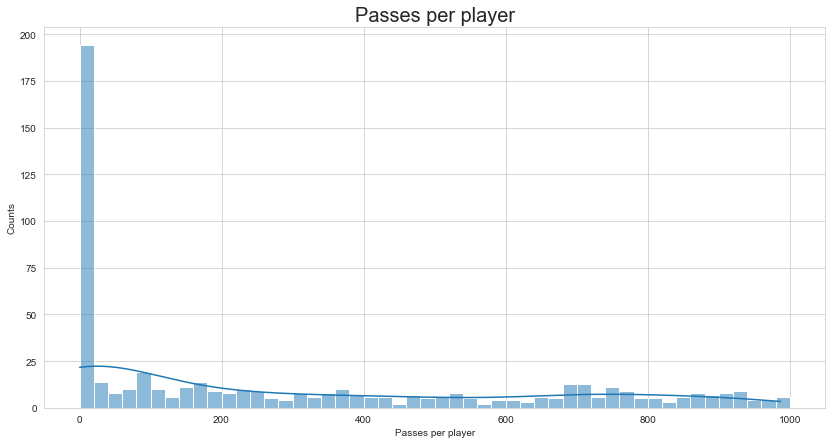

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.histplot(df.Passes, kde='True', binwidth=20)
plt.title ('Passes per player', size=20)
plt.xlabel ('Passes per player')
plt.ylabel ('Counts');


There must be a lot of players that has NOT play any minute, so we are going to repeat the stats removing them from the data set

In [48]:
df2=df.copy()
df2 = df2[df2['Minutes played']>0]

In [49]:
df2.Passes.describe()

count    491.000000
mean     337.763601
std      324.860827
min        0.000000
25%        7.000000
50%      232.000000
75%      650.500000
max      987.000000
Name: Passes, dtype: float64

In [52]:
df2.Passes.value_counts()

6.000      4
983.000    4
686.000    4
778.000    3
22.000     3
          ..
1.288      1
1.184      1
1.306      1
765.000    1
501.000    1
Name: Passes, Length: 419, dtype: int64

Of the 491 players of the dataset that have played at least 1 minute:
 - the mean on number of passes is 337
 - the median is the same as the 50% quartile, therefore 232 passes
 - the standard deviation is 324 passes
 - the mode is 6, 686 and 983  passes

## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

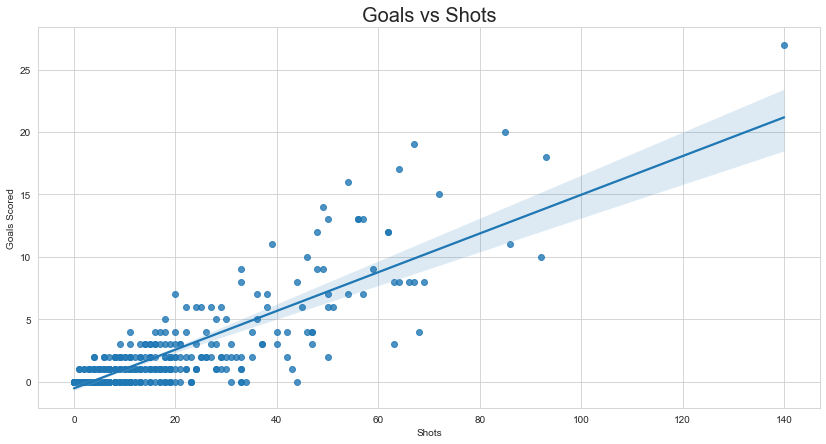

In [53]:
plt.figure(figsize=(14,7))
sns.regplot(data=df2, x='Shots', y='Goals scored.1')
plt.title('Goals vs Shots', size=20)
plt.xlabel('Shots')
plt.ylabel('Goals Scored');

The correlation in between The Goals Scored and Number of Shots can be calculated as:

In [54]:
df2['Goals scored.1'].corr(df2['Shots'])

0.8462014768466807

## Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

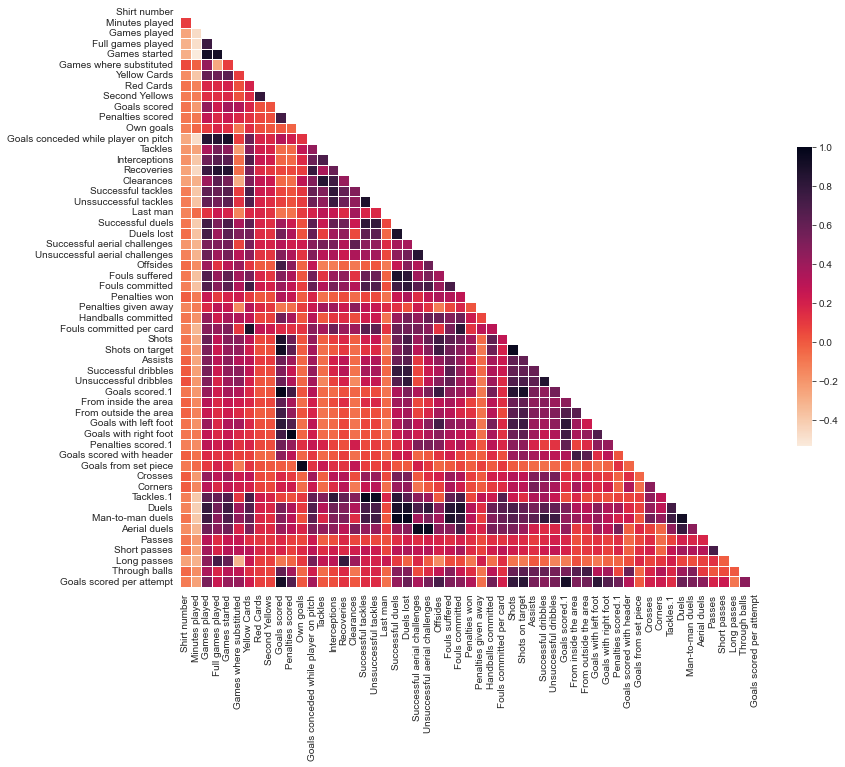

In [55]:
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.color_palette("rocket_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5});
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5});

The heatmap allow as to see very quickly the correlation in between all variables using a color map

## Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [73]:
# Geometric Mean
geometricMean = stats.gmean(df2.loc[:,'Minutes played'])
print ('The Geometric Mean is: {:.3f}'.format(geometricMean)) 

The Geometric Mean is: 10.867


In [72]:
# Harmonic Mean
print('The Harmonic Mean is: {:.3f}'.format(statistics.harmonic_mean(df2['Minutes played'])))

The Harmonic Mean is: 2.857
